In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-18 13:12:13
MODIFIED: 2022-10-31 10:48:45
"""

# -*- coding:utf-8 -*-

import sys
sys.path.append('../../acllite')

from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from model import preprocessing,postprocessing

import acl, cv2, struct, time
import numpy as np
from PIL import Image, ImageDraw

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device_id = 0

img_path = "data/person.jpg"

coco_names_path = "data/coco.names"
model_path = "model/yolov4.om"

predict_img_path = "predictions.jpg"

In [4]:
acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 363888
malloc output 1, size 7277760
Create model output dataset success
Init model resource success


In [5]:
img_org_bgr = cv2.imread(img_path)
data = preprocessing(img_org_bgr,model._model_desc)

%timeit -n 10 -r 3
result_list = model.execute([data,])    

bboxes = postprocessing(result_list,img_org_bgr,coco_names_path,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 3, 608, 608]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'Concat_1679:0:classes', 'dimCount': 4, 'dims': [1, 22743, 1, 4]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'Concat_1680:0:boxes', 'dimCount': 3, 'dims': [1, 22743, 80]}, 0)
model output datatype 0
[Model] class Model init resource stage success
box type:  ndarray
box shape:  (1, 22743, 1, 4)
box shape:  (1, 22743, 4)
-----------------------------------
       max and argmax : 0.010866
                  nms : 0.001421
Post processing total : 0.012286
-----------------------------------
person: 0.998047
dog: 0.995117
horse: 0.984375
save plot results to predictions.jpg
saved


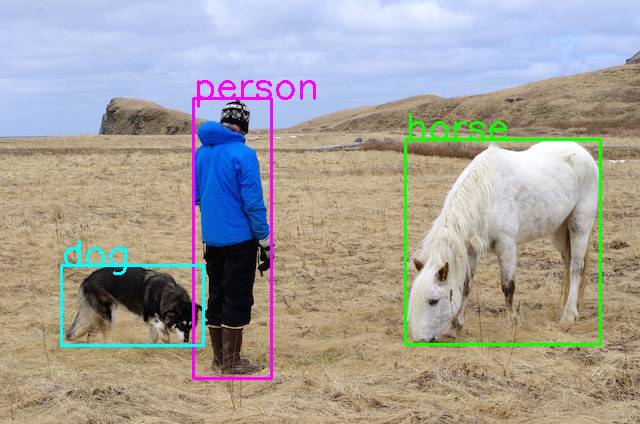

In [6]:
img = Image.open("predictions.jpg")
img